In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 1. Load data

In [2]:
# Load the data
df = pd.read_csv("BankChurners.csv")

In [3]:

c_data = df[df.columns[:-2]]

In [4]:
# Drop the columns that are not needed
df_drop = c_data.drop(['CLIENTNUM',"Total_Ct_Chng_Q4_Q1", "Total_Trans_Ct","Total_Amt_Chng_Q4_Q1", "Avg_Open_To_Buy", "Total_Revolving_Bal",  ], axis=1)
df_drop

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,15476,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,8764,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,10291,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,8395,0.000


In [5]:
# Drop the columns that are not needed
df=df_drop.drop(['Gender',"Attrition_Flag","Education_Level","Marital_Status","Income_Category","Card_Category"], axis=1)
df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,1144,0.061
1,49,5,44,6,1,2,8256.0,1291,0.105
2,51,3,36,4,1,0,3418.0,1887,0.000
3,40,4,34,3,4,1,3313.0,1171,0.760
4,40,3,21,5,1,0,4716.0,816,0.000


# 2. Scale

In [6]:
# Scale data
sc = StandardScaler()
sc.fit(df)
scaled_data_array = sc.transform(df)
scaled_data = pd.DataFrame(scaled_data_array, columns=df.columns)
scaled_data.shape

#applied PCE


(10127, 9)

In [7]:
import pickle
pickle.dump(sc, open("scaler.pkl", "wb"))

# 3. Test k 

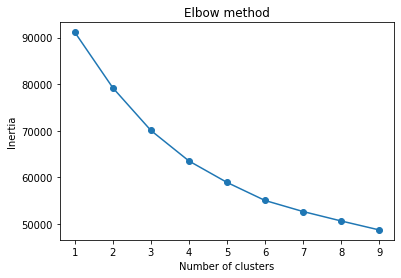

In [8]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

# 4 . Fit Cluster Model

In [9]:

model = KMeans(n_clusters=3)
clustered_data = model.fit_predict(scaled_data)
print(model.labels_)

[1 1 1 ... 0 1 1]


In [10]:
model.cluster_centers_

array([[-0.07948031,  0.205482  , -0.05832453, -0.66547482, -0.06833914,
        -0.12323059,  1.30428443,  1.19284226, -0.63468212],
       [-0.66183468,  0.24878238, -0.59000879,  0.20223517, -0.05121297,
         0.03744455, -0.34955655, -0.29345043,  0.1557835 ],
       [ 0.99341326, -0.48140184,  0.8778979 ,  0.12057905,  0.11511056,
         0.02233522, -0.30313218, -0.31467861,  0.16793839]])

In [11]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

# 5. Visualisation

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scaled_data_pca = pca.fit_transform(scaled_data)


c:\Churn_venv\Churn\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


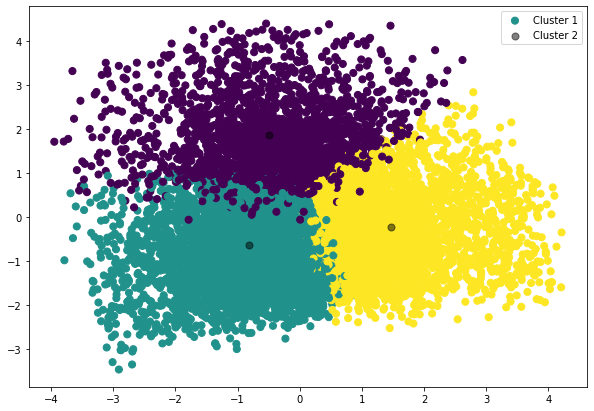

In [13]:
from sklearn import cluster


plt.figure(figsize=(10,7))
plt.scatter(scaled_data_pca[:,0], scaled_data_pca[:,1], c=clustered_data, s=50, cmap='viridis')
#scaled_data["label_"] = model.labels_
centroids = pca.transform(model.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], c='black', s=50, alpha=0.5)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()